<a href="https://colab.research.google.com/github/Jihyesh/codestates_projects_section2/blob/main/Vestiaire_Collective_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem frame

1. 해결하고자 하는 문제가 적용되는 시나리오를 제시합니다.
  - Consumer to consumer(C2C) 플랫폼에 가입한 사용자가 `구매`활동을 할지, 사용자의 `판매`가 얼마나 증가할 지 확인
  - 기대 효과 시나리오 : 잠재적 고객을 알아보고, 홍보와 마케팅을 집중
2. 문제 해결의 필요성에 대해 명확히 제시합니다.
  - 플랫폼의 활용도를 확인하고, 명품 재판매(중고 명품 구매)를 활발하게 하기 위한 방안을 확인
3. 데이터셋 선정이 끝났다면 어떤 유형의 문제로 (분류 / 회귀) 접근할지도 결정합니다.
  - 데이터셋은 Vestiaire Collective 이용자의 거래, 커뮤니티 활동, 인구통계학적 정보
  - 구매 활동에 대해서는 분류 문제로 접근하여, 가입한 이후 구매로 이어지는지 확인
  - 판매 활동에 대해서는 회귀 문제로 접근하여, 판매량과 판매율을 증가시키는 요인이 무엇인지 확인
4. 데이터셋에서 해결하고자 하는 문제 정의에 적절한 타겟을 선정합니다.
  - 구매 활동의 타겟: `productsBought`
  - 판매 활동의 타겟: `productsSold`
5. 타겟을 잘 설명할 수 있을 만한 특성에 대한 가설을 설정합니다.
  - 미혼인 여성이 구매로 이어질 확률이 높다
  - 명품 재고를 많이 가지고 있는 판매자의 판매량이 높을 것이고, 재고를 많이 보여주기 때문에 커뮤니티 팔로워수가 많은 사용자의 판매량과 판매율 모두 높다





 ##### 🥕 <font color ='Orange'> **Note style** </font>

# 🏃 Import Libriaries & option

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, accuracy_score
from sklearn.pipeline import make_pipeline


In [2]:
pd.set_option('display.max_columns', None)
# pd.reset_option('^display.')

In [107]:
!pip3 install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 1.2 MB/s 
     |████████████████████████████████| 13.1 MB 14.1 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=9dbecbd42ffee8c0ae27a87ac113a6ba49443c8fba029ad728747f729499eb73
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=af7adffd374810e5fbccc0486638c4e8c9d822b000ff3f86553acea6be9f890c
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pdpbox sklearn
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [3]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.5 MB/s 


# 🏃 Import files

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# #to see what files are in codestates file
# !ls "/content/drive/MyDrive/codestates/section2 project"

import pandas as pd
url ='/content/drive/MyDrive/codestates/section2 project/6M-0K-99K.users.dataset.public.csv'
# df = pd.read_excel(url, sheet_name=0)
df = pd.read_csv(url)

df.head()

Mounted at /content/drive


,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,104,1,M,1,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,0,0,F,2,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,6870940546848049750,user,France,fr,137,13,60,33,163,94.0,10,3,F,2,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,-4640272621319568052,user,Etats-Unis,en,131,10,14,122,152,92.0,7,0,F,2,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,-5175830994878542658,user,Etats-Unis,en,167,8,0,25,125,100.0,0,0,F,2,mrs,False,False,False,True,22,2854,95.13,7.93,us


In [5]:
df_clean = df.copy()

# 🏃 Model for Buyer

## 🏃 Drop unusable variables


In [6]:
df_clean.columns

Index(['identifierHash', 'type', 'country', 'language', 'socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'productsBought',
       'gender', 'civilityGenderId', 'civilityTitle', 'hasAnyApp',
       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin',
       'seniority', 'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype='object')

In [7]:
# drop duplicate, high cardinality, meaningless features
drop_features = ['identifierHash', 'type', 'country', 'countryCode', 'gender', 'civilityTitle', 'hasAnyApp', 'seniorityAsMonths', 'seniorityAsYears']

In [8]:
df_clean = df_clean.drop( columns = drop_features, axis=1)

In [9]:
df_clean.columns

Index(['language', 'socialNbFollowers', 'socialNbFollows',
       'socialProductsLiked', 'productsListed', 'productsSold',
       'productsPassRate', 'productsWished', 'productsBought',
       'civilityGenderId', 'hasAndroidApp', 'hasIosApp', 'hasProfilePicture',
       'daysSinceLastLogin', 'seniority'],
      dtype='object')

In [10]:
df_clean.shape

(98913, 15)

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   language             98913 non-null  object 
 1   socialNbFollowers    98913 non-null  int64  
 2   socialNbFollows      98913 non-null  int64  
 3   socialProductsLiked  98913 non-null  int64  
 4   productsListed       98913 non-null  int64  
 5   productsSold         98913 non-null  int64  
 6   productsPassRate     98913 non-null  float64
 7   productsWished       98913 non-null  int64  
 8   productsBought       98913 non-null  int64  
 9   civilityGenderId     98913 non-null  int64  
 10  hasAndroidApp        98913 non-null  bool   
 11  hasIosApp            98913 non-null  bool   
 12  hasProfilePicture    98913 non-null  bool   
 13  daysSinceLastLogin   98913 non-null  int64  
 14  seniority            98913 non-null  int64  
dtypes: bool(3), float64(1), int64(10), o

In [12]:
df_clean.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
language,98913,5,en,51564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
socialNbFollowers,98913.0,NaN,NaN,NaN,3.432269,3.882383,3.0,3.0,3.0,3.0,744.0
socialNbFollows,98913.0,NaN,NaN,NaN,8.425677,52.839572,0.0,8.0,8.0,8.0,13764.0
socialProductsLiked,98913.0,NaN,NaN,NaN,4.420743,181.030569,0.0,0.0,0.0,0.0,51671.0
productsListed,98913.0,NaN,NaN,NaN,0.093304,2.050144,0.0,0.0,0.0,0.0,244.0
productsSold,98913.0,NaN,NaN,NaN,0.121592,2.126895,0.0,0.0,0.0,0.0,174.0
productsPassRate,98913.0,NaN,NaN,NaN,0.812303,8.500205,0.0,0.0,0.0,0.0,100.0
productsWished,98913.0,NaN,NaN,NaN,1.562595,25.192793,0.0,0.0,0.0,0.0,2635.0
productsBought,98913.0,NaN,NaN,NaN,0.171929,2.332266,0.0,0.0,0.0,0.0,405.0
civilityGenderId,98913.0,NaN,NaN,NaN,1.773993,0.428679,1.0,2.0,2.0,2.0,3.0


## 🏃 Target - productsBought ('Buy', X_train, X_val)

 🥕 <font color ='Orange'> **hold out, 데이터 셋 수가 적지 않기 때문에 cross validation을 쓰지 않고, hold out을 씀** </font>

In [16]:
df_B = df_clean

In [17]:
def buy(x):
  if x > 0:
    return 1
  else:
    return 0 

df_clean['Buy'] = df_clean['productsBought'].apply(lambda x :buy(x))


In [18]:
df_B.head()

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,Buy
0,en,147,10,77,26,174,74.0,104,1,1,False,True,True,11,3196,1
1,en,167,8,2,19,170,99.0,0,0,2,False,True,True,12,3204,0
2,fr,137,13,60,33,163,94.0,10,3,2,False,True,False,11,3203,1
3,en,131,10,14,122,152,92.0,7,0,2,False,True,False,12,3198,0
4,en,167,8,0,25,125,100.0,0,0,2,False,False,True,22,2854,0


In [19]:
df_B = df_clean.drop('productsBought', axis=1)

In [20]:
# Train, Valuation, Test split

from sklearn.model_selection import train_test_split

target = 'Buy'

train, test = train_test_split(df_B, test_size=0.2, stratify=df_B[target])
train, val = train_test_split(train, test_size=0.2, stratify=train[target])


# Target, Features split

y_train = train[target]
X_train = train.drop(columns = target)
y_val = val[target]
X_val = val.drop(columns = target)
y_test = test[target]
X_test = test.drop(columns = target)

# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(63304, 14) (63304,) (15826, 14) (15826,) (19783, 14) (19783,)


## 🌱 Baseline(logistic regression, recall = 0.75)

In [ ]:
# Train, Valuation, Test split

from sklearn.model_selection import train_test_split

target = 'Buy'

train, test = train_test_split(df_B, test_size=0.2, stratify=df_B[target])
train, val = train_test_split(train, test_size=0.2, stratify=train[target])


# Target, Features split

y_train = train[target]
X_train = train.drop(columns = target)
y_val = val[target]
X_val = val.drop(columns = target)
y_test = test[target]
X_test = test.drop(columns = target)

# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(63304, 14) (63304,) (15826, 14) (15826,) (19783, 14) (19783,)


In [21]:
df_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   language             98913 non-null  object 
 1   socialNbFollowers    98913 non-null  int64  
 2   socialNbFollows      98913 non-null  int64  
 3   socialProductsLiked  98913 non-null  int64  
 4   productsListed       98913 non-null  int64  
 5   productsSold         98913 non-null  int64  
 6   productsPassRate     98913 non-null  float64
 7   productsWished       98913 non-null  int64  
 8   civilityGenderId     98913 non-null  int64  
 9   hasAndroidApp        98913 non-null  bool   
 10  hasIosApp            98913 non-null  bool   
 11  hasProfilePicture    98913 non-null  bool   
 12  daysSinceLastLogin   98913 non-null  int64  
 13  seniority            98913 non-null  int64  
 14  Buy                  98913 non-null  int64  
dtypes: bool(3), float64(1), int64(10), o

In [22]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression

# sklearn의 로지스틱 회귀모델은 디폴트로 L2 penalty가 적용되는 정규화 모델입니다. 따라서 모델을 만들기 전 표준화 작업이 필요합니다.

In [23]:
# 수치형 데이터 scaling
from sklearn.preprocessing import StandardScaler
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index

scaler = StandardScaler()
X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_val[numeric_feats] = scaler.transform(X_val[numeric_feats])
X_test[numeric_feats] = scaler.transform(X_test[numeric_feats])

In [24]:
# Ordinal encoding

from category_encoders import OrdinalEncoder

enc = OrdinalEncoder()
X_train = enc.fit_transform(X_train)
X_val = enc.transform(X_val)
X_train.head() # changed language data type to ordinal number

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority
59884,1,-0.100294,-0.008854,-0.021419,-0.043744,-0.061111,-0.097154,0.020213,0.530101,-0.225297,-0.530306,0.140941,-2.528950,0.778400
39581,1,-0.100294,-0.008854,-0.021419,-0.043744,-0.061111,-0.097154,-0.062926,0.530101,-0.225297,-0.530306,0.140941,0.583262,0.802176
44380,1,-0.100294,-0.008854,-0.021419,-0.043744,-0.061111,-0.097154,-0.062926,0.530101,-0.225297,-0.530306,0.140941,0.578488,0.796232
5652,2,0.357325,-0.008854,-0.021419,-0.043744,-0.061111,-0.097154,-0.062926,-1.796728,-0.225297,1.885705,0.140941,0.382782,-1.230631
87634,2,-0.100294,-0.008854,-0.021419,-0.043744,-0.061111,-0.097154,-0.021357,0.530101,-0.225297,-0.530306,0.140941,0.530755,-1.254406


👇 <font color ='red'>**이해가 덜 된 부분. 꼭! 이해해야 발표 가능**</font>

y_val_pred는 1,0,1,0 .. 인데 sigmoid를 씌우기 전에 이런 결과가 나오는건가?

In [25]:
# Logistic regression

logistic = LogisticRegression(class_weight='balanced')
logistic.fit(X_train, y_train)
y_val_pred = logistic.predict(X_val)
print('logistic train accuracy', logistic.score(X_train, y_train).round(2))
# print("logistic validation accuracy: ", accuracy_score(y_val, y_val_pred).round(2))

logistic train accuracy 0.84


In [26]:
print('회귀계수가 양수인 특성 상위 3개')
print(pd.Series(logistic.coef_[0], logistic.feature_names_in_).sort_values(ascending=False).head(3), '\n')
print('회귀계수가 음수인 특성 하위 3개')
print(pd.Series(logistic.coef_[0], logistic.feature_names_in_).sort_values(ascending=False).tail(3))

회귀계수가 양수인 특성 상위 3개
socialNbFollowers      1.847097
productsWished         1.397352
socialProductsLiked    1.085603
dtype: float64 

회귀계수가 음수인 특성 하위 3개
productsSold         -0.442160
daysSinceLastLogin   -0.845417
socialNbFollows      -3.143505
dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


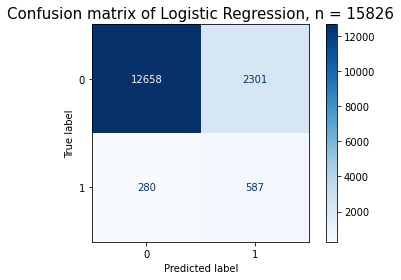

In [27]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(logistic, X_val, y_val,   # logistic은 위에서 학습시켜 둔 oject
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix of Logistic Regression, n = {len(y_val)}', fontsize=15)
plt.show()

In [41]:
587/(280+587)

0.6770472895040369

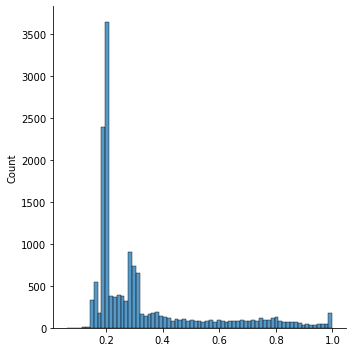

In [28]:
y_pred_proba = logistic.predict_proba(X_val)[:,1] #index별 Positive (1)일 확률을 나타낸 array
sns.displot(y_pred_proba)


False    12938
True      2888
dtype: int64
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     14959
           1       0.20      0.68      0.31       867

    accuracy                           0.84     15826
   macro avg       0.59      0.76      0.61     15826
weighted avg       0.94      0.84      0.87     15826



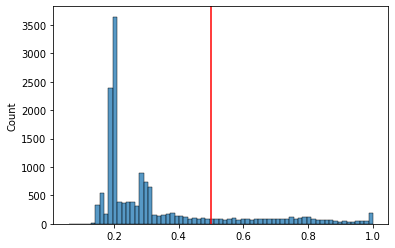

In [32]:
threshold = 0.5
y_pred = y_pred_proba > threshold #Positive일 확률이 0.5보다 큰 것만 짜름

ax = sns.histplot(y_pred_proba)
ax.axvline(threshold, color='red')

print(pd.Series(y_pred).value_counts())
print(classification_report(y_val, y_pred))

In [33]:
# roc_curve 함수를 사용하면 각 임계값에 따른 fpr과 tpr을 쉽게 구할 수 있습니다.

from sklearn.metrics import roc_curve

# roc_curve(타겟값, prob of 1)

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPR(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPR(Recall),Threshold
0,0.000000,0.000000,2.000000
1,0.000134,0.008074,1.000000
2,0.000134,0.019608,1.000000
3,0.000267,0.019608,1.000000
4,0.000267,0.026528,1.000000
...,...,...,...
2363,0.997727,1.000000,0.144164
2364,0.997861,1.000000,0.143599
2365,0.997995,1.000000,0.143036
2366,0.998396,1.000000,0.142588


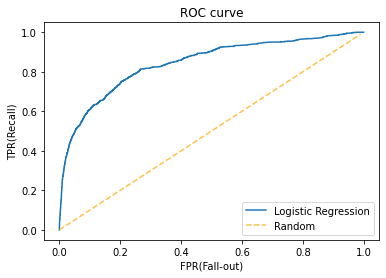

In [34]:
# 위의 tpr, fpr, threshold를 이용해 ROC Curve를 그려보겠습니다.

plt.plot(fpr, tpr, label='Logistic Regression')
x_base = np.arange(0, 1.0, 0.01)
y_base = np.arange(0, 1.0, 0.01)
plt.plot(x_base, y_base, linestyle='--', color = 'orange', alpha=0.7, label='Random')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.legend();

In [35]:
# auc_score 역시 sklearn에서 손쉽게 불러와 사용할 수 있습니다.

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_val, y_pred_proba)
print(f"Logistic Regression의 auc score : {auc.round(3)}")

# Positive 샘플의 확률이 Negative 샘플의 확률보다 클 확률이 0.843

Logistic Regression의 auc score : 0.843


idx: 961 , threshold: 0.3939024438161381


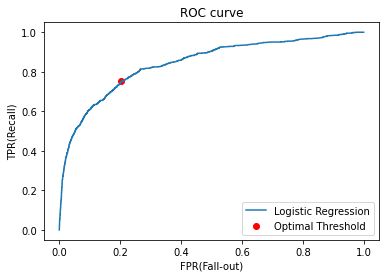

In [36]:
# ROC curve를 이용하면 최적의 임계값을 찾을 수 있습니다. TPR - FPR이 최대가 되는 지점

# threshold 최대값의 인덱스, np.argmax()
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

optimal_fpr = roc[roc['Threshold'] == optimal_threshold]['FPR(Fall-out)']
optimal_tpr = roc[roc['Threshold'] == optimal_threshold]['TPR(Recall)']

plt.plot(fpr, tpr, label='Logistic Regression')

plt.scatter(optimal_fpr, optimal_tpr, color = 'red', alpha=1, label='Optimal Threshold')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.legend();

In [37]:
y_pred_optimal = y_pred_proba >= optimal_threshold
print(classification_report(y_val, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     14959
           1       0.18      0.75      0.29       867

    accuracy                           0.79     15826
   macro avg       0.58      0.77      0.58     15826
weighted avg       0.94      0.79      0.85     15826



 🥕 <font color ='Orange'> **baseline에서 recall = 0.75** </font>

False    12126
True      3700
dtype: int64
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     14959
           1       0.18      0.75      0.29       867

    accuracy                           0.79     15826
   macro avg       0.58      0.77      0.58     15826
weighted avg       0.94      0.79      0.85     15826



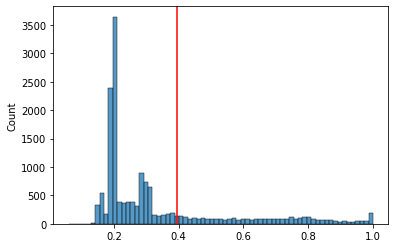

In [40]:
threshold = 0.3939024438161381
y_pred = y_pred_proba > threshold #Positive일 확률이 0.5보다 큰 것만 짜름

ax = sns.histplot(y_pred_proba)
ax.axvline(threshold, color='red')

print(pd.Series(y_pred).value_counts())
print(classification_report(y_val, y_pred))

In [39]:
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, accuracy_score

print('support 는 True data에서의 count를 내 놓음\n')
print(classification_report(y_val, y_val_pred))

# accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# print(f'accuracy of logistic regression is {accuracy.round(2)}')
print(f'precision of logistic regression is {precision.round(2)}')
print(f'recall of logistic regression is {recall.round(2)}')
print(f'f1 of logistic regression is {f1.round(2)}')

support 는 True data에서의 count를 내 놓음

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     14959
           1       0.20      0.68      0.31       867

    accuracy                           0.84     15826
   macro avg       0.59      0.76      0.61     15826
weighted avg       0.94      0.84      0.87     15826

precision of logistic regression is 0.2
recall of logistic regression is 0.68
f1 of logistic regression is 0.31


## 🧪 XGBoost (recall = 0.77)

In [67]:
# Train, Valuation, Test split

from sklearn.model_selection import train_test_split

target = 'Buy'

train, test = train_test_split(df_B, test_size=0.2, stratify=df_B[target])
train, val = train_test_split(train, test_size=0.2, stratify=train[target])


# Target, Features split

y_train = train[target]
X_train = train.drop(columns = target)
y_val = val[target]
X_val = val.drop(columns = target)
y_test = test[target]
X_test = test.drop(columns = target)

# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(63304, 14) (63304,) (15826, 14) (15826,) (19783, 14) (19783,)


In [68]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    XGBClassifier(                    # booster를 지정하지 않으면, default 는 Gradient Boosting Decision Tree model
        objective="binary:logistic",  # target이 yes or no
        eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
        n_estimators=200,
        random_state=42,
        n_jobs=-1,  # n_jobs=-1로 지정하면 컴퓨터의 모든 코어를 사용 (n_jobs=4로 했는데 -1로 지정한 것과 성능이 똑같다면, PC의 코어가 4개이기 때문)
        max_depth=7,
        learning_rate=0.1,
    ),
)
print(pipe)

# 모델을 학습합니다.
pipe.fit(X_train, y_train)

# 정확도를 확인합니다.
from sklearn.metrics import classification_report
# train 학습, 검증셋 정확도
print("검증 정확도", pipe.score(X_val, y_val))
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('xgbclassifier',
                 XGBClassifier(eval_metric='error', max_depth=7,
                               n_estimators=200, n_jobs=-1, random_state=42))])
검증 정확도 0.9519777581195501
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     14959
           1       0.63      0.30      0.40       867

    accuracy                           0.95     15826
   macro avg       0.80      0.64      0.69     15826
weighted avg       0.94      0.95      0.94     15826



 ##### 🥕 <font color ='Orange'>**recall = 0.26**
 **No adjustment for imbalance !**</br>
 **max_depth=6, min_child_weight=6, colsample_bytree=0.7, learning_rate=0.1** </font>

In [69]:
# train, val = train_test_split(train, test_size=0.2, stratify=train[target])
# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=6,
        colsample_bytree=0.7,
        learning_rate=0.1,
        use_label_encoder=False,
    ),
)

pipe.fit(X_train, y_train)
print("검증 AUC: ", pipe.score(X_val, y_val))

검증 AUC:  0.9522305067610262


              precision    recall  f1-score   support

           0       0.96      0.99      0.97     14959
           1       0.62      0.25      0.35       867

    accuracy                           0.95     15826
   macro avg       0.79      0.62      0.66     15826
weighted avg       0.94      0.95      0.94     15826



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


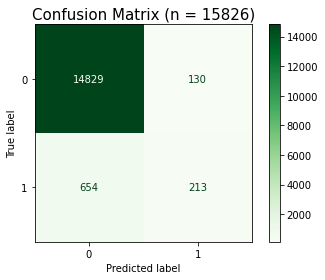

AUC: 0.8914735648450245


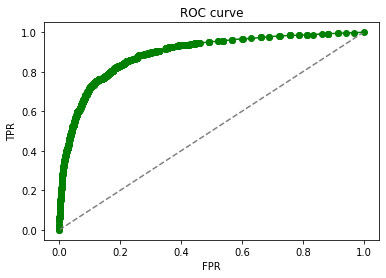

In [82]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


print(classification_report(y_val, pipe.predict(X_val)))

plot_confusion_matrix(pipe, X_val, y_val, cmap=plt.cm.Greens)
plt.title(f"Confusion Matrix (n = {len(y_val)})", fontsize=15)
plt.show()

y_pred_proba = pipe.predict_proba(X_val)[:, 1]   # predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1 사이의 값으로 돌려준다. 
print("AUC:", roc_auc_score(y_val, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_val, [0] * len(y_val))
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="grey", label="Baseline")
plt.plot(fpr, tpr, color="Green", label="Model")
plt.scatter(fpr, tpr, color="Green")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

🥕 <font color ='Orange'> **(Accurcay 성능이 너무 좋으니까,) feature importance 확인** </font>

<BarContainer object of 14 artists>

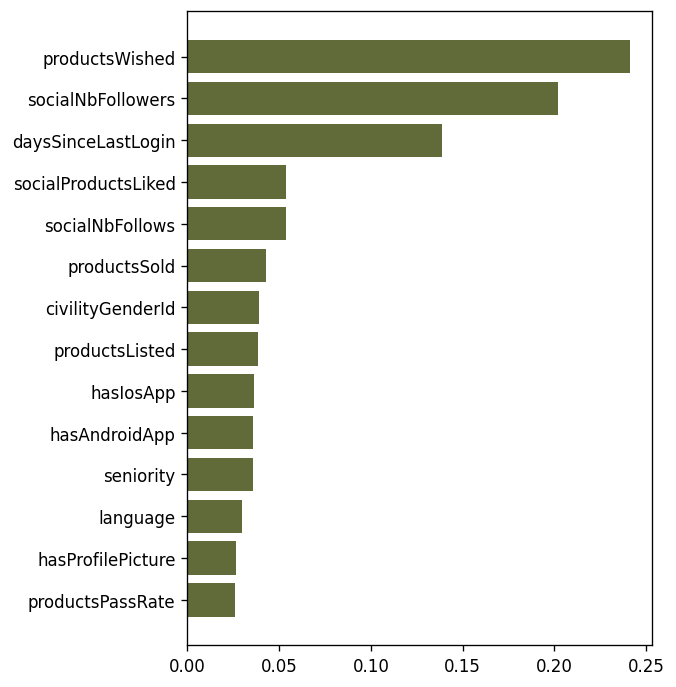

In [71]:
import matplotlib.pyplot as plt

feature_importances = list(
    zip(X_train.columns, pipe.named_steps["xgbclassifier"].feature_importances_)  # feature name, feature importance를 리스트로
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True) # feature importance value 기준 내림차순(reverse=True)

plt.figure(figsize=(5, 7), dpi=120) # dpi(dot per inch)는 해상도

# [(feature 이름i, feature importance 값i)]에서 *로 원소 하나씩 꺼내서 list로 바꿈
# [feature 이름, feature importance 값i]를 *로 하나씩 꺼내서 barh (y축, x축)에 추가함
plt.barh(*list(zip(*feature_importances[::-1])), color ='#616B3A') # plt.barh(y, values, color='#e35f62')
# plt.axvline(0.05, color="green", linewidth=0.5) # vertical line을 그림

🥕 <font color ='Orange'> **Activity가 높아질 수록 구매로 이어진다는 것을 알 수 있음, Selling 제외하고, activity와 무관한 특성을 제거하고 모델을 다시 확인** </font>

 ##### 🥕 <font color ='Orange'>**recall = 0.26**
 **No adjustment for imbalance !**</br>
 **max_depth=6, min_child_weight=6, colsample_bytree=0.7, learning_rate=0.1**</br>
 **leave only features relevant to activity** </font>

In [73]:
# feature_importances[0:5]
activity_features = ['productsWished','socialNbFollowers','daysSinceLastLogin','socialNbFollows','socialProductsLiked']

In [74]:
# Train, Valuation, Test split
from sklearn.model_selection import train_test_split

target = 'Buy'

train, test = train_test_split(df_B, test_size=0.2, stratify=df_B[target])
train, val = train_test_split(train, test_size=0.2, stratify=train[target])


# Target, Features split

y_train = train[target]
X_train = train[activity_features]
y_val = val[target]
X_val = val[activity_features]
y_test = test[target]
X_test = test[activity_features]

# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(63304, 5) (63304,) (15826, 5) (15826,) (19783, 5) (19783,)


In [75]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    XGBClassifier(                    # booster를 지정하지 않으면, default 는 Gradient Boosting Decision Tree model
        objective="binary:logistic",  # target이 yes or no
        eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
        n_estimators=200,
        random_state=42,
        n_jobs=-1,  # n_jobs=-1로 지정하면 컴퓨터의 모든 코어를 사용 (n_jobs=4로 했는데 -1로 지정한 것과 성능이 똑같다면, PC의 코어가 4개이기 때문)
        max_depth=7,
        learning_rate=0.1,
    ),
)
print(pipe)

# 모델을 학습합니다.
pipe.fit(X_train, y_train)

# 정확도를 확인합니다.
from sklearn.metrics import classification_report
# train 학습, 검증셋 정확도
print("검증 정확도", pipe.score(X_val, y_val))
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('xgbclassifier',
                 XGBClassifier(eval_metric='error', max_depth=7,
                               n_estimators=200, n_jobs=-1, random_state=42))])
검증 정확도 0.9505244534310628
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     14959
           1       0.62      0.26      0.36       867

    accuracy                           0.95     15826
   macro avg       0.79      0.62      0.67     15826
weighted avg       0.94      0.95      0.94     15826



🥕 <font color ='Orange'> **Activity feature만으로 평가하니까, recall 변화 없음 0.26에서 0.26으로 </br> score auc로 다시 확인** </font>

 ##### 🥕 <font color ='Orange'>**recall = 0.25**
 **No adjustment for imbalance !**</br>
 **max_depth=6, min_child_weight=6, colsample_bytree=0.7, learning_rate=0.1**</br>
 **leave only features relevant to activity** </font>

In [76]:
# train, val = train_test_split(train, test_size=0.2, stratify=train[target])
# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=6,
        colsample_bytree=0.7,
        learning_rate=0.1,
        use_label_encoder=False,
    ),
)

pipe.fit(X_train, y_train)
print("검증 AUC: ", pipe.score(X_val, y_val))

검증 AUC:  0.9504612662706938


              precision    recall  f1-score   support

           0       0.96      0.99      0.97     14959
           1       0.62      0.25      0.35       867

    accuracy                           0.95     15826
   macro avg       0.79      0.62      0.66     15826
weighted avg       0.94      0.95      0.94     15826



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


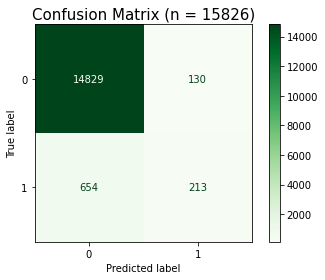

AUC: 0.8914735648450245


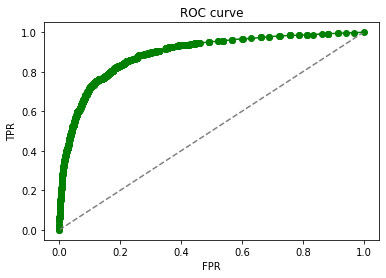

In [81]:
print(classification_report(y_val, pipe.predict(X_val)))

plot_confusion_matrix(pipe, X_val, y_val, cmap=plt.cm.Greens)
plt.title(f"Confusion Matrix (n = {len(y_val)})", fontsize=15)
plt.show()

y_pred_proba = pipe.predict_proba(X_val)[:, 1]   # predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1 사이의 값으로 돌려준다. 
print("AUC:", roc_auc_score(y_val, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_val, [0] * len(y_val))
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="grey", label="Baseline")
plt.plot(fpr, tpr, color="green", label="Model")
plt.scatter(fpr, tpr, color="green")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

🥕 <font color ='Orange'> **Activity feature만으로 평가하니까, score auc로 해봐도 score가 0.26에서 0.25로 떨어짐** </font>

🥕 <font color ='Orange'> **Crossweight을 넣어서 다시 성능 확인** </font>

 ##### 🥕 <font color ='Orange'>**recall = 0.76**
 **Adjustment for imbalance !**</br>
 **max_depth=6, min_child_weight=6, colsample_bytree=0.7, learning_rate=0.1**</br>
 **leave only features relevant to activity**</font>

In [87]:
# train, val = train_test_split(train, test_size=0.2, stratify=train[target])
# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=6,
        colsample_bytree=0.7,
        learning_rate=0.1,
        use_label_encoder=False,
        scale_pos_weight=(y_val == 0).sum() / (y_val == 1).sum(), # 가중치를 균일하게 조정
    ),
)

pipe.fit(X_train, y_train)
print("검증 AUC: ", pipe.score(X_val, y_val))

검증 AUC:  0.8474030077088336


              precision    recall  f1-score   support

           0       0.98      0.85      0.91     14959
           1       0.23      0.76      0.35       867

    accuracy                           0.85     15826
   macro avg       0.61      0.81      0.63     15826
weighted avg       0.94      0.85      0.88     15826



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


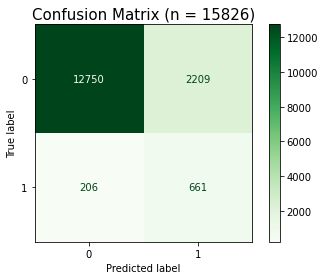

AUC: 0.8861406105562046


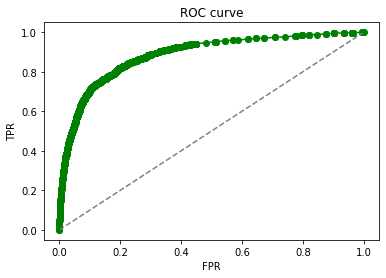

In [88]:
print(classification_report(y_val, pipe.predict(X_val)))

plot_confusion_matrix(pipe, X_val, y_val, cmap=plt.cm.Greens)
plt.title(f"Confusion Matrix (n = {len(y_val)})", fontsize=15)
plt.show()

# test

y_pred_proba = pipe.predict_proba(X_val)[:, 1]   # predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1 사이의 값으로 돌려준다. 
print("AUC:", roc_auc_score(y_val, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_val, [0] * len(y_val))
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="grey", label="Baseline")
plt.plot(fpr, tpr, color="Green", label="Model")
plt.scatter(fpr, tpr, color="Green")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

🥕 <font color ='Orange'> **Crossweight을 넣으니, 성능이 많이 올랐음! recall 0.27에서 0.76 </br> activity_feature만, cross weight을 줬을 떄의 성능** </font>

🥕 <font color ='Orange'> **모든 feature, cross weight으로 다시 확인** </font>

 ##### 🥕 <font color ='Orange'>**recall = 0.76 _final**
 **No adjustment for imbalance !**</br>
 **max_depth=6, min_child_weight=6, colsample_bytree=0.7, learning_rate=0.1**</br>
 **all features**  </br>
 **Precision from 0.23 to 0.26** </font>

In [89]:
# Train, Valuation, Test split
from sklearn.model_selection import train_test_split

target = 'Buy'

train, test = train_test_split(df_B, test_size=0.2, stratify=df_B[target])
train, val = train_test_split(train, test_size=0.2, stratify=train[target])


# Target, Features split

y_train = train[target]
X_train = train.drop(columns=target)
y_val = val[target]
X_val = val.drop(columns=target)
y_test = test[target]
X_test = test.drop(columns=target)

# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(63304, 14) (63304,) (15826, 14) (15826,) (19783, 14) (19783,)


In [90]:
# train, val = train_test_split(train, test_size=0.2, stratify=train[target])
# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=6,
        colsample_bytree=0.7,
        learning_rate=0.1,
        use_label_encoder=False,
        scale_pos_weight=(y_val == 0).sum() / (y_val == 1).sum(), # 가중치를 균일하게 조정
    ),
)

pipe.fit(X_train, y_train)
print("검증 AUC: ", pipe.score(X_val, y_val))

검증 AUC:  0.8680652091495008


              precision    recall  f1-score   support

           0       0.98      0.87      0.93     14959
           1       0.26      0.76      0.39       867

    accuracy                           0.87     15826
   macro avg       0.62      0.82      0.66     15826
weighted avg       0.94      0.87      0.90     15826



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


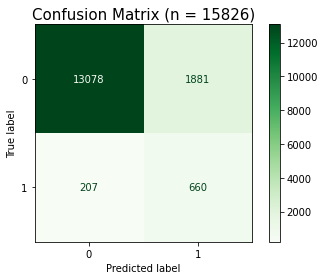

AUC: 0.9048457556382679


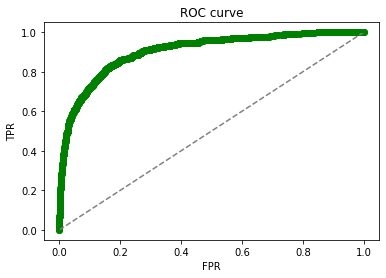

In [91]:
print(classification_report(y_val, pipe.predict(X_val)))

plot_confusion_matrix(pipe, X_val, y_val, cmap=plt.cm.Greens)
plt.title(f"Confusion Matrix (n = {len(y_val)})", fontsize=15)
plt.show()

# test

y_pred_proba = pipe.predict_proba(X_val)[:, 1]   # predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1 사이의 값으로 돌려준다. 
print("AUC:", roc_auc_score(y_val, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_val, [0] * len(y_val))
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="grey", label="Baseline")
plt.plot(fpr, tpr, color="Green", label="Model")
plt.scatter(fpr, tpr, color="green")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

🥕 <font color ='Orange'> **(참고) socialNbFollowers를 drop하면 recall = 0.73** </font>

In [145]:
# Train, Valuation, Test split
from sklearn.model_selection import train_test_split

target = 'Buy'

train, test = train_test_split(df_B, test_size=0.2, stratify=df_B[target])
train, val = train_test_split(train, test_size=0.2, stratify=train[target])


# Target, Features split

y_train = train[target]
X_train = train.drop(columns=[target,'socialNbFollowers'])
y_val = val[target]
X_val = val.drop(columns=[target,'socialNbFollowers'])
y_test = test[target]
X_test = test.drop(columns=[target,'socialNbFollowers'])

# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(63304, 13) (63304,) (15826, 13) (15826,) (19783, 13) (19783,)


In [146]:
# train, val = train_test_split(train, test_size=0.2, stratify=train[target])
# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=6,
        colsample_bytree=0.7,
        learning_rate=0.1,
        use_label_encoder=False,
        scale_pos_weight=(y_val == 0).sum() / (y_val == 1).sum(), # 가중치를 균일하게 조정
    ),
)

pipe.fit(X_train, y_train)
print("검증 AUC: ", pipe.score(X_val, y_val))

검증 AUC:  0.8362820674838872


              precision    recall  f1-score   support

           0       0.98      0.84      0.91     14959
           1       0.21      0.73      0.33       867

    accuracy                           0.84     15826
   macro avg       0.60      0.79      0.62     15826
weighted avg       0.94      0.84      0.88     15826



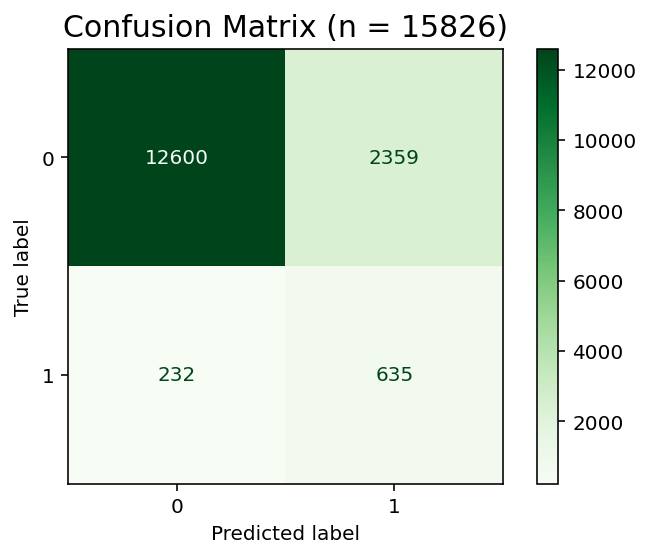

AUC: 0.878304428105025


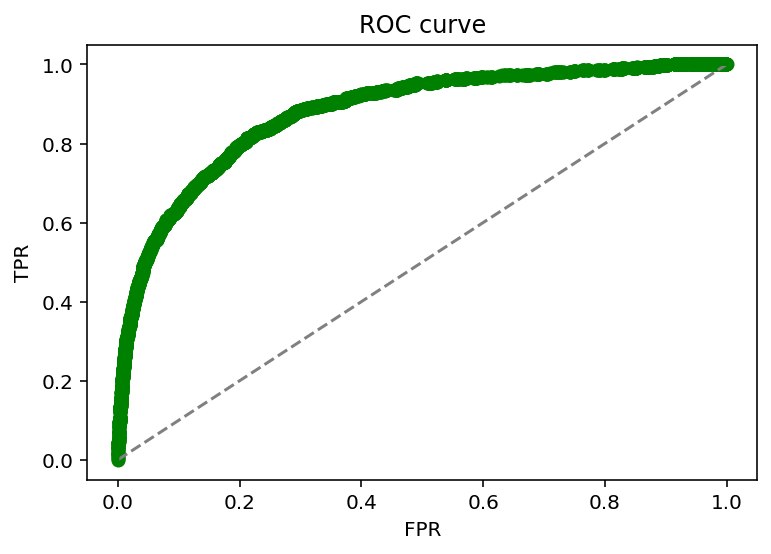

In [150]:
print(classification_report(y_val, pipe.predict(X_val)))

plot_confusion_matrix(pipe, X_val, y_val, cmap=plt.cm.Greens)
plt.title(f"Confusion Matrix (n = {len(y_val)})", fontsize=15)
plt.show()

# test

y_pred_proba = pipe.predict_proba(X_val)[:, 1]   # predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1 사이의 값으로 돌려준다. 
print("AUC:", roc_auc_score(y_val, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_val, [0] * len(y_val))
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="grey", label="Baseline")
plt.plot(fpr, tpr, color="Green", label="Model")
plt.scatter(fpr, tpr, color="green")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

🥕 <font color ='Orange'> **"모든 feature", cross weight을 넣으면 recall이 0.77, precision 0.26** </font>

In [92]:
!pip3 install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.3 MB/s 
     |████████████████████████████████| 133 kB 51.1 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=66e20956ebe0fa8c393085d3fa4b831977aac42754c5dd2289ef6a52fdd36b49
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


<BarContainer object of 14 artists>

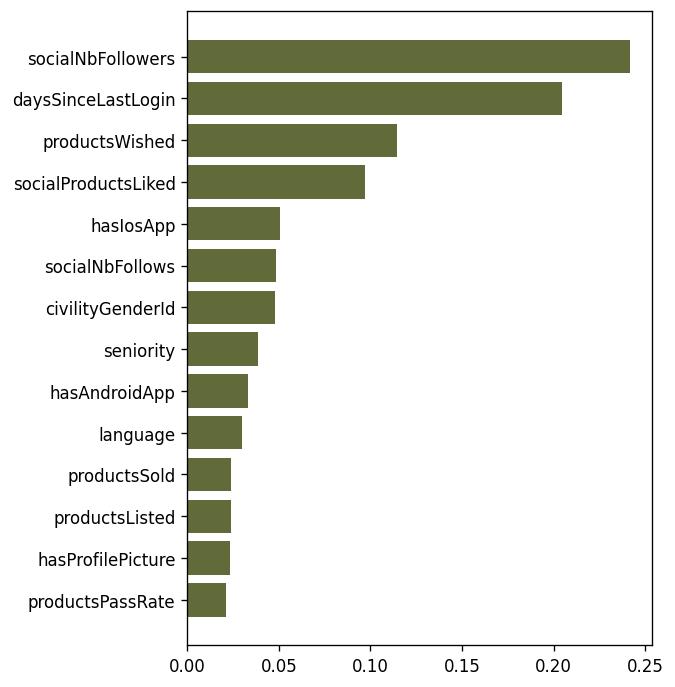

In [93]:
import matplotlib.pyplot as plt

feature_importances = list(
    zip(X_train.columns, pipe.named_steps["xgbclassifier"].feature_importances_)  # feature name, feature importance를 리스트로
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True) # feature importance value 기준 내림차순(reverse=True)

plt.figure(figsize=(5, 7), dpi=120) # dpi(dot per inch)는 해상도

# [(feature 이름i, feature importance 값i)]에서 *로 원소 하나씩 꺼내서 list로 바꿈
# [feature 이름, feature importance 값i]를 *로 하나씩 꺼내서 barh (y축, x축)에 추가함
plt.barh(*list(zip(*feature_importances[::-1])), color = '#616B3A') 
# plt.axvline(0.05, color="red", linewidth=0.5) # vertical line을 그림

🥕 <font color ='Orange'> **"모든 feature", cross weight을 넣으면 feature importance가 달라짐, Follwers가 가장 중요. 구매자에게 왜 follwers가 많은거지** </font>

🥕 <font color ='Orange'> **Seller관련한 feature drop (cross weight)으로 확인** </font>

In [94]:
Seller_features = ['productsListed','productsSold','productsPassRate']

In [95]:
# Train, Valuation, Test split
from sklearn.model_selection import train_test_split

target = 'Buy'

train, test = train_test_split(df_B, test_size=0.2, stratify=df_B[target])
train, val = train_test_split(train, test_size=0.2, stratify=train[target])


# Target, Features split
Seller_features = Seller_features + [target]

y_train = train[target]
X_train = train.drop(columns=Seller_features)
y_val = val[target]
X_val = val.drop(columns=Seller_features)
y_test = test[target]
X_test = test.drop(columns=Seller_features)

# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(63304, 11) (63304,) (15826, 11) (15826,) (19783, 11) (19783,)


In [96]:
# train, val = train_test_split(train, test_size=0.2, stratify=train[target])
# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=6,
        colsample_bytree=0.7,
        learning_rate=0.1,
        use_label_encoder=False,
        scale_pos_weight=(y_val == 0).sum() / (y_val == 1).sum(), # 가중치를 균일하게 조정
    ),
)

pipe.fit(X_train, y_train)
print("검증 AUC: ", pipe.score(X_val, y_val))

검증 AUC:  0.8649690382914191


              precision    recall  f1-score   support

           0       0.98      0.87      0.92     14959
           1       0.25      0.76      0.38       867

    accuracy                           0.86     15826
   macro avg       0.62      0.81      0.65     15826
weighted avg       0.94      0.86      0.89     15826



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


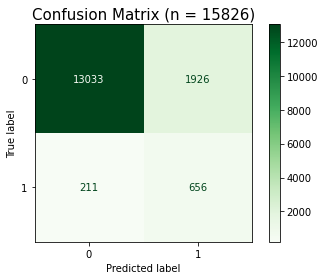

AUC: 0.8977303823067941


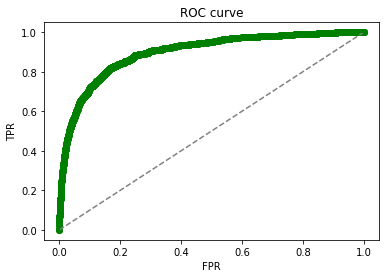

In [97]:
print(classification_report(y_val, pipe.predict(X_val)))

plot_confusion_matrix(pipe, X_val, y_val, cmap=plt.cm.Greens)
plt.title(f"Confusion Matrix (n = {len(y_val)})", fontsize=15)
plt.show()

# test

y_pred_proba = pipe.predict_proba(X_val)[:, 1]   # predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1 사이의 값으로 돌려준다. 
print("AUC:", roc_auc_score(y_val, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_val, [0] * len(y_val))
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="grey", label="Baseline")
plt.plot(fpr, tpr, color="Green", label="Model")
plt.scatter(fpr, tpr, color="green")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<BarContainer object of 11 artists>

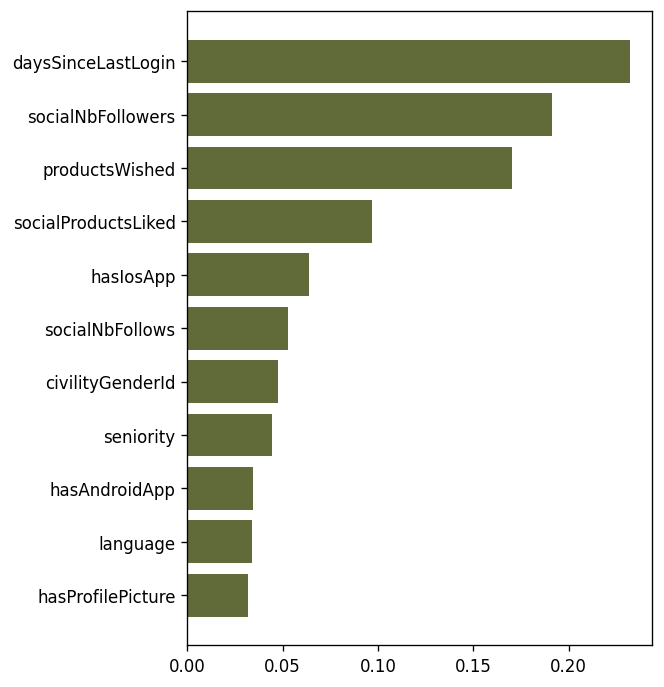

In [98]:
import matplotlib.pyplot as plt

feature_importances = list(
    zip(X_train.columns, pipe.named_steps["xgbclassifier"].feature_importances_)  # feature name, feature importance를 리스트로
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True) # feature importance value 기준 내림차순(reverse=True)

plt.figure(figsize=(5, 7), dpi=120) # dpi(dot per inch)는 해상도

# [(feature 이름i, feature importance 값i)]에서 *로 원소 하나씩 꺼내서 list로 바꿈
# [feature 이름, feature importance 값i]를 *로 하나씩 꺼내서 barh (y축, x축)에 추가함
plt.barh(*list(zip(*feature_importances[::-1])), color = '#616B3A') 
# plt.axvline(0.05, color="red", linewidth=0.5) # vertical line을 그림

🥕 <font color ='Orange'> **Seller관련한 feature drop (cross weight)하면 recall은 0.77 그대로 유지됨 (precision이 0.26에서 0.25으로 감소)** </font>

#### 🥕 <font color ='Orange'> **Interpretation** </font>

In [99]:
df_B.socialNbFollowers.describe()

count    98913.000000
mean         3.432269
std          3.882383
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max        744.000000
Name: socialNbFollowers, dtype: float64

In [100]:
df_B.query('(Buy ==1)').sort_values(by='socialNbFollowers', ascending=True).sample(10)


,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,Buy
207,es,19,10,14,54,12,83.3,108,1,True,False,True,22,2854,1
33346,fr,3,8,0,0,0,0.0,0,1,False,False,True,688,3205,1
85710,en,3,8,0,0,0,0.0,16,2,False,False,True,404,2854,1
2981,en,7,8,15,0,0,0.0,3,2,False,True,True,469,3205,1
34564,en,3,9,1,0,0,0.0,0,2,False,True,True,11,3200,1
97016,en,3,8,4,0,0,0.0,1,2,False,True,True,183,3204,1
93659,fr,3,8,0,0,0,0.0,0,1,False,False,True,691,2852,1
13053,fr,4,8,0,0,0,0.0,0,2,False,False,True,677,2856,1
497,de,7,9,141,2,5,100.0,171,2,False,False,True,11,3198,1
6879,fr,4,8,0,0,0,0.0,0,1,False,False,False,671,3201,1


In [101]:
df_B.query('(socialNbFollowers >3) &(Buy ==1)').sort_values(by='socialNbFollowers', ascending=False).sample(10)

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,Buy
3077,en,7,8,17,0,0,0.0,7,2,True,False,True,26,3196,1
5087,de,5,8,556,0,0,0.0,15,2,False,False,True,12,3198,1
7531,fr,4,8,0,0,0,0.0,0,2,True,False,True,617,3200,1
3879,en,6,8,20,0,0,0.0,4,2,False,True,True,16,3204,1
2676,en,8,10,5,2,0,0.0,23,3,False,False,True,41,3205,1
1726,fr,4,8,0,0,1,0.0,0,1,False,False,True,675,2859,1
4719,en,5,8,11,1,0,0.0,2,2,False,True,True,37,3201,1
818,es,17,9,15,3,2,100.0,11,2,False,True,True,12,2856,1
3692,en,6,9,1,0,0,0.0,0,2,False,True,True,150,2857,1
3013,en,7,11,527,0,0,0.0,2,2,False,True,True,22,3198,1


🥕 <font color ='Orange'> **socialNbFollowers를 ICE로 그려보자, 도대체 Buy랑 무슨 상관인건지** </font>

In [102]:
# 데이터셋(data), 분석할 데이터의 index(data_index), 변화를 확인할 특성명(target_feature), 바꿔넣어 볼 특성의 범위(target_feature_range)를 입력하면
# 해당 범위에서 모델의 예측 양상의 변화를 반환하는 함수를 작성합니다.
def get_ice_plot_data(data, data_index, target_feature, target_feature_range):
    one_datapoint = data.iloc[[data_index]].copy()
    results = []

    for target_value in target_feature_range:
        one_datapoint[target_feature] = target_value
        one_datapoint_pred_proba = pipe.predict_proba(one_datapoint)[:, 1]  # 0이 될 확률[:,0] 1이 될 확률[:,1]
        results.append(one_datapoint_pred_proba.item())  # element를 추가한다
    results = np.array(results)
    return target_feature_range, results - results[0]  # np.array + scaler = np.array

In [103]:
X_val.info()  # ICE plot 그릴 때, object type이 껴있으면 에러가 남, ordinal encoding까지 해야 된다

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15826 entries, 58055 to 76253
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   language             15826 non-null  object
 1   socialNbFollowers    15826 non-null  int64 
 2   socialNbFollows      15826 non-null  int64 
 3   socialProductsLiked  15826 non-null  int64 
 4   productsWished       15826 non-null  int64 
 5   civilityGenderId     15826 non-null  int64 
 6   hasAndroidApp        15826 non-null  bool  
 7   hasIosApp            15826 non-null  bool  
 8   hasProfilePicture    15826 non-null  bool  
 9   daysSinceLastLogin   15826 non-null  int64 
 10  seniority            15826 non-null  int64 
dtypes: bool(3), int64(7), object(1)
memory usage: 1.1+ MB


100%|██████████| 4/4 [00:00<00:00, 26.02it/s]


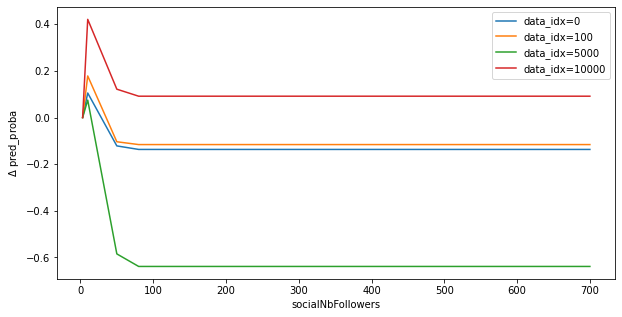

In [104]:
plt.figure(figsize=(10,5))

from tqdm import tqdm    # tqdm: Python에서 tqdm 라이브러리를 이용한 작업진행률 표시

target_feature = "socialNbFollowers"
# target_feature_range = range(X_val["socialNbFollowers"].min(), X_val["socialNbFollowers"].max() + 1)
target_feature_range = [3, 10, 50, 80, 100, 300, 500, 700]


# for data_index in tqdm(range(len(X_val))):
for data_index in tqdm([0,100, 5000, 10000]):

    plt.plot(
        *get_ice_plot_data(
            X_val, data_index, target_feature, target_feature_range
        ),
        label=f"data_idx={data_index}",
    )


plt.xlabel(target_feature)
plt.ylabel("$\Delta$ pred_proba")
plt.legend()

In [ ]:
X_val.iloc[[0,100, 5000, 10000]]

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsWished,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority
64765,en,3,8,0,0,2,False,False,True,698,2859
32111,en,3,8,1,0,2,False,True,True,704,3200
75612,en,3,8,14,10,2,False,False,True,37,2856
12562,en,4,10,0,0,2,False,False,True,29,2857


In [ ]:
X_val

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsWished,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority
64765,en,3,8,0,0,2,False,False,True,698,2859
59469,fr,3,8,0,0,1,False,True,True,696,3195
65973,en,3,8,0,0,1,False,True,True,697,2858
3511,fr,6,10,47,18,2,False,True,True,16,3197
89253,en,3,8,0,0,2,False,False,True,692,2853
...,...,...,...,...,...,...,...,...,...,...,...
26492,en,3,8,0,0,2,False,True,True,689,3201
78857,en,3,8,0,0,2,False,False,True,694,2855
82920,es,3,8,0,0,2,False,False,True,693,2854
39309,en,3,8,0,0,2,False,True,True,703,3199


100%|██████████| 4/4 [00:00<00:00, 29.95it/s]


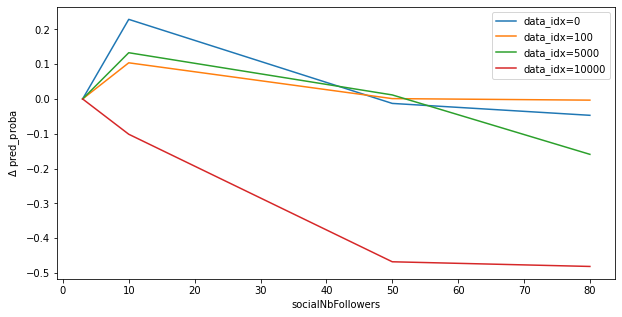

In [ ]:
plt.figure(figsize=(10,5))

from tqdm import tqdm    # tqdm: Python에서 tqdm 라이브러리를 이용한 작업진행률 표시

target_feature = "socialNbFollowers"
# target_feature_range = range(X_val["socialNbFollowers"].min(), X_val["socialNbFollowers"].max() + 1)
target_feature_range = [3, 10, 50, 80]


# for data_index in tqdm(range(len(X_val))):
for data_index in tqdm([0,100, 5000, 10000]):

    plt.plot(
        *get_ice_plot_data(
            X_val, data_index, target_feature, target_feature_range
        ),
        label=f"data_idx={data_index}",
    )


plt.xlabel(target_feature)
plt.ylabel("$\Delta$ pred_proba")
plt.legend()

100%|██████████| 4/4 [00:00<00:00, 25.05it/s]


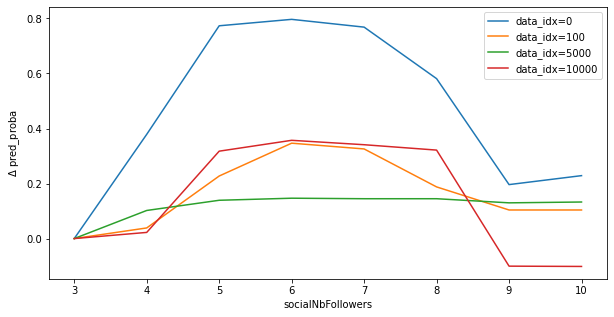

In [ ]:
plt.figure(figsize=(10,5))

from tqdm import tqdm    # tqdm: Python에서 tqdm 라이브러리를 이용한 작업진행률 표시

target_feature = "socialNbFollowers"
# target_feature_range = range(X_val["socialNbFollowers"].min(), X_val["socialNbFollowers"].max() + 1)
target_feature_range = [3, 4, 5, 6, 7, 8, 9, 10]


# for data_index in tqdm(range(len(X_val))):
for data_index in tqdm([0,100, 5000, 10000]):

    plt.plot(
        *get_ice_plot_data(
            X_val, data_index, target_feature, target_feature_range
        ),
        label=f"data_idx={data_index}",
    )


plt.xlabel(target_feature)
plt.ylabel("$\Delta$ pred_proba")
plt.legend()

🥕 <font color ='Orange'> **socialNbFollowers를 많이 늘린다고 구매할 확률이 높아지는건 아니고, default보다 한~두개 더 늘어난 4-5개일 때 구매 확률이 늘어난다. 나를 follow한 user꺼 구경하러 가서 사는건가? 데이터가 너무 많은데, 타겟을 알아보고 추천하면, 살 가능성이 높아지는 것 같다. 판매자들이 자기의 물건을 살만한 사람을 많이 불러모을수록, 구매로 이어질 확률이 높아진다. </br> 판매자가 자기가 가진 물건이 자신이 있으면, 이거 한 번 봐보라고 제안할 것이고, 구매자는 정보의 바다에서 가치없는 물건 대신에 고려해 볼 만한 물건을 보게 되고, 구매하기 괜찮다고 생각해서 구매하는 것. </br>판매자의 안목이 중요하다. "이거 중고로 사도 꽤 괜찮아" 라는 안목!</br> 해석이 너무 멀리 갔음** </font>

##### 🥕 <font color ='Orange'> **PDP_socialNbFollowers** </font>

In [105]:
# dpi(dots per inch) 수치를 조정해 이미지 화질을 조정 할 수 있습니다
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 144

(<Figure size 1152x864 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7f0dc190>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7fb141d0>})

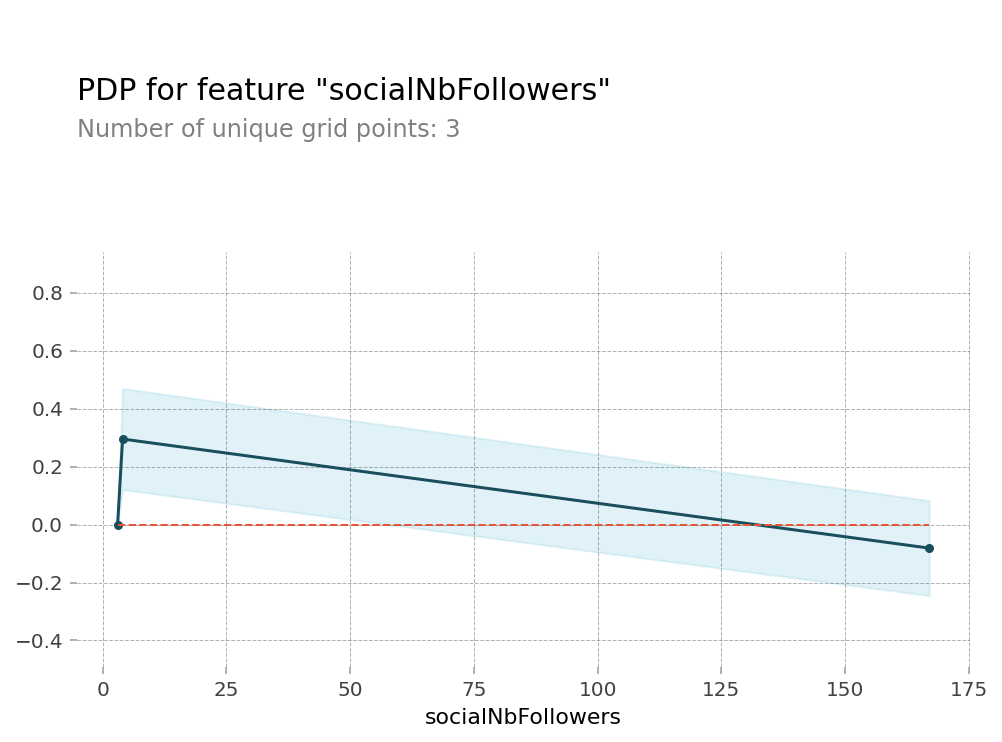

In [125]:
from pdpbox.pdp import pdp_isolate, pdp_plot

target_feature = "socialNbFollowers"

isolated = pdp_isolate(
    model=pipe, # sklearn model
    dataset=X_val,  # data set to train on the model
    model_features=X_val.columns, # list of model features
    feature=target_feature, # feature list to investigate
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=11,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature, figsize=(8,6),)

(<Figure size 1152x864 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7f435a50>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7f029450>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7efde910>}})

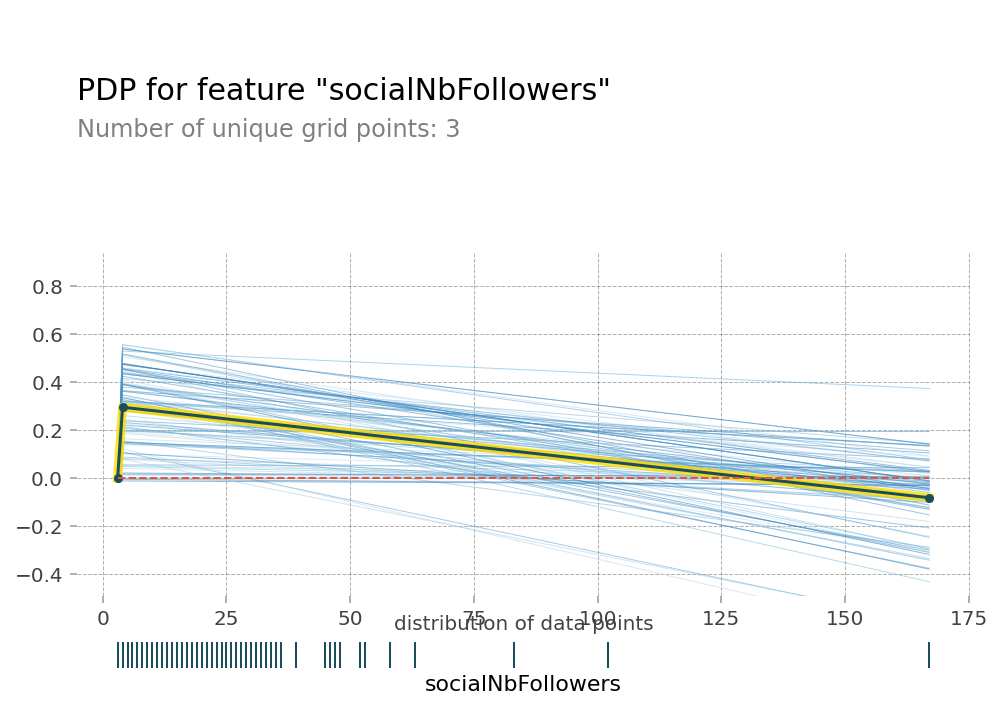

In [126]:
pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=100,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True, # 그래프 아래 분포도 함께 표시
    figsize=(8,6),
)

##### 🥕 <font color ='Orange'> **PDP_daysSinceLastLogin** </font>

(<Figure size 1152x864 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7de41d10>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7ddd9090>})

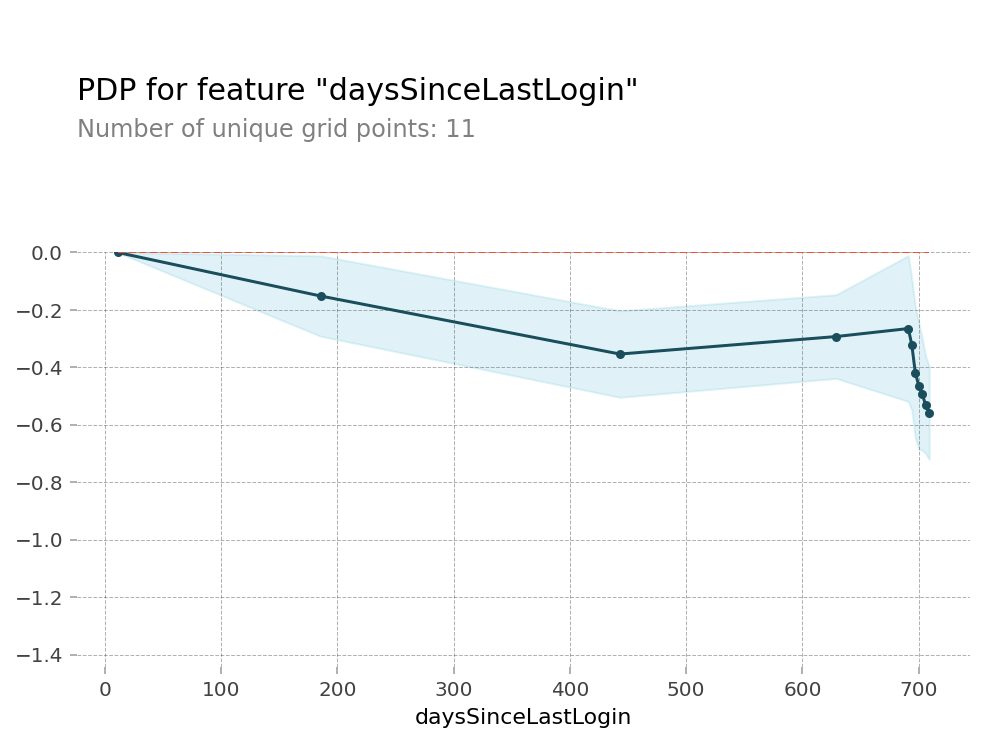

In [138]:
from pdpbox.pdp import pdp_isolate, pdp_plot

target_feature = "daysSinceLastLogin"

isolated = pdp_isolate(
    model=pipe, # sklearn model
    dataset=X_val,  # data set to train on the model
    model_features=X_val.columns, # list of model features
    feature=target_feature, # feature list to investigate
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=11,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature, figsize=(8,6),)

(<Figure size 1152x864 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7dcdd950>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7dd33650>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7dcb1050>}})

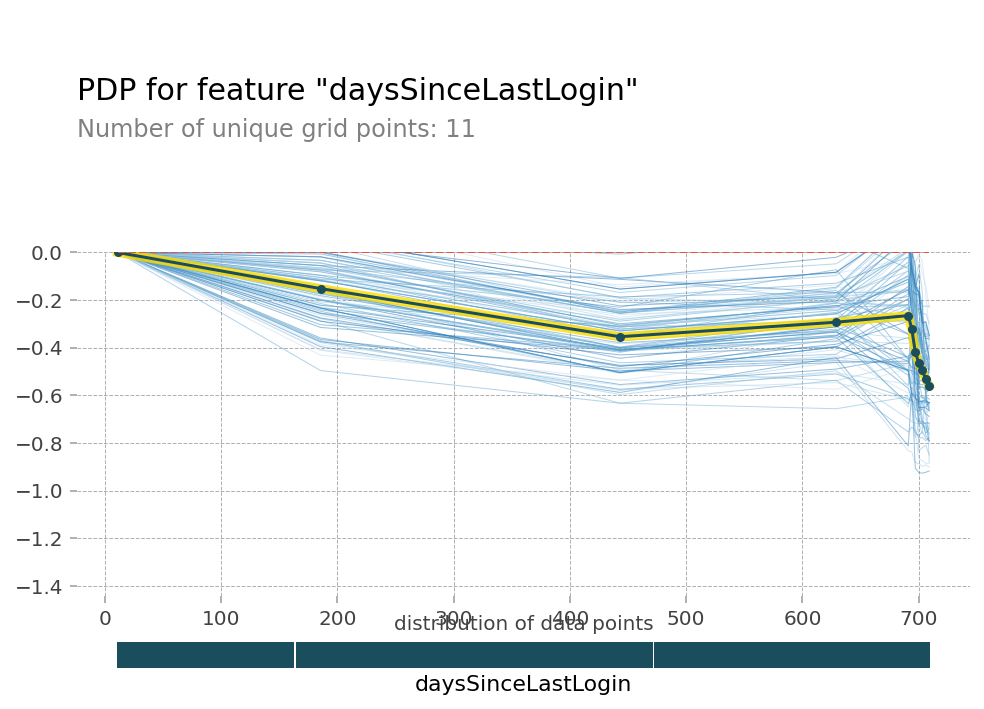

In [139]:


pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=100,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True, # 그래프 아래 분포도 함께 표시
    figsize=(8,6),
)

##### 🥕 <font color ='Orange'> **PDP_productsWished** </font>

(<Figure size 1152x864 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7d770fd0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7d770110>})

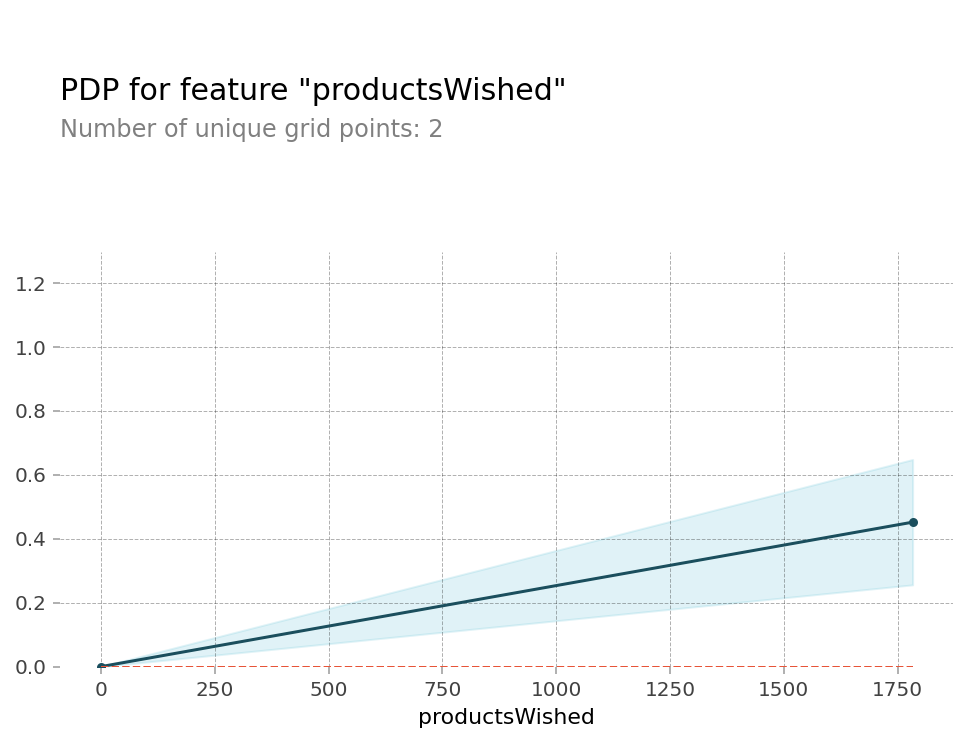

In [142]:
target_feature = "productsWished"

isolated = pdp_isolate(
    model=pipe, # sklearn model
    dataset=X_val,  # data set to train on the model
    model_features=X_val.columns, # list of model features
    feature=target_feature, # feature list to investigate
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=11,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature, figsize=(8,6),)

(<Figure size 1152x864 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7da3b890>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7d9ad050>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7d9673d0>}})

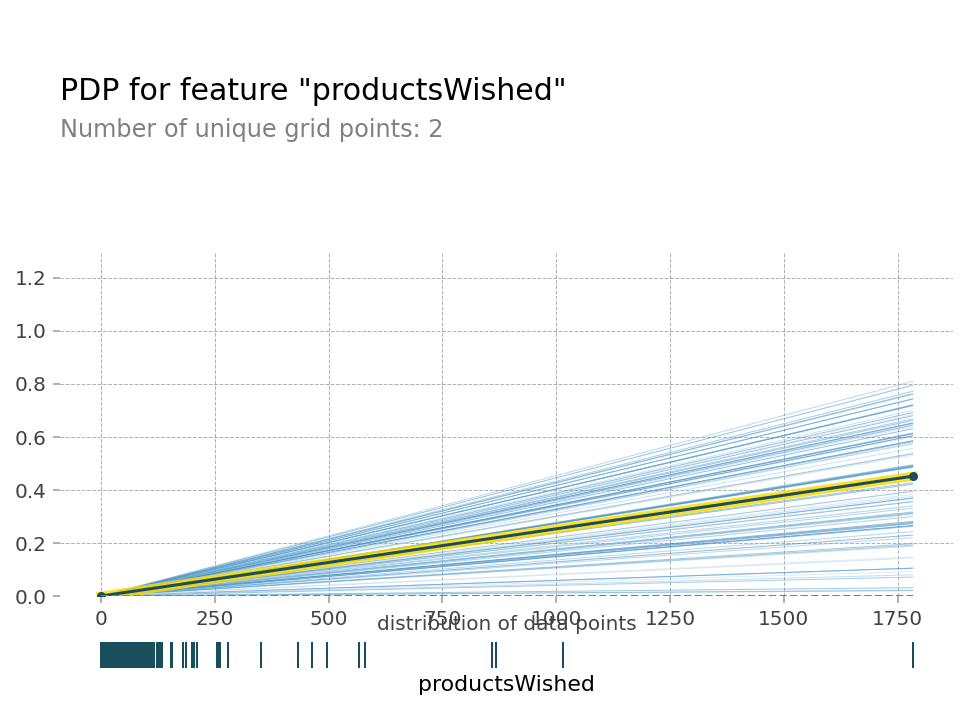

In [141]:


pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=100,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True, # 그래프 아래 분포도 함께 표시
    figsize=(8,6),
)

##### 🥕 <font color ='Orange'> **PDP_socialProductsLiked** </font>

(<Figure size 1152x864 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7d6a2d50>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7d6ac3d0>})

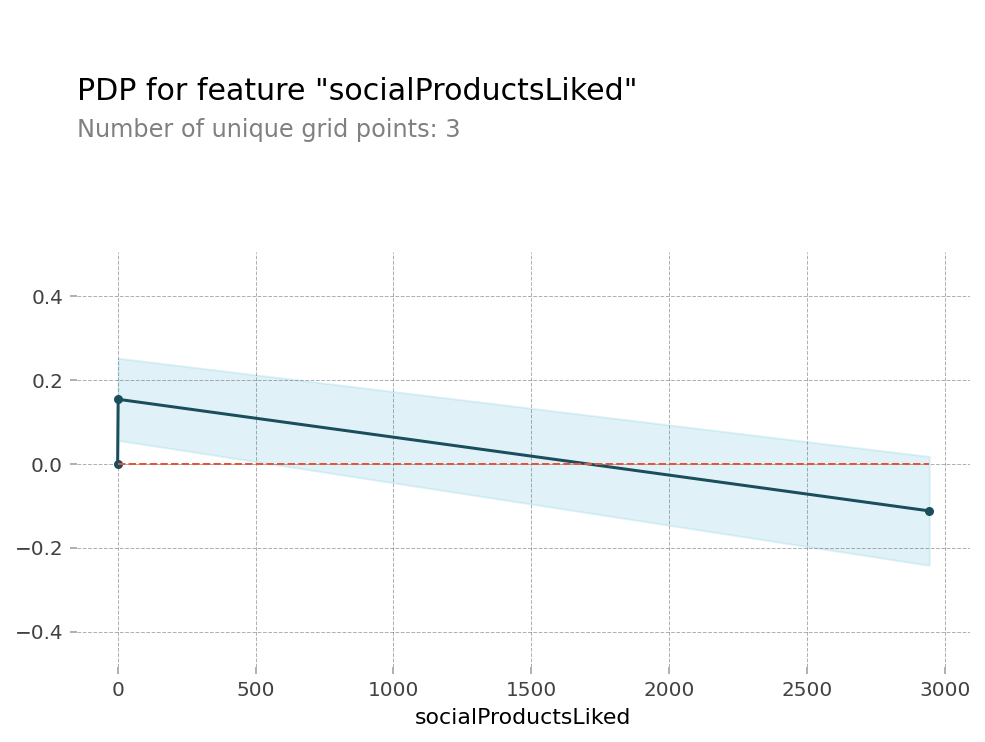

In [143]:
target_feature = "socialProductsLiked"

isolated = pdp_isolate(
    model=pipe, # sklearn model
    dataset=X_val,  # data set to train on the model
    model_features=X_val.columns, # list of model features
    feature=target_feature, # feature list to investigate
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=11,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature, figsize=(8,6),)

(<Figure size 1152x864 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7d5fb610>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7d5b9950>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7d56ecd0>}})

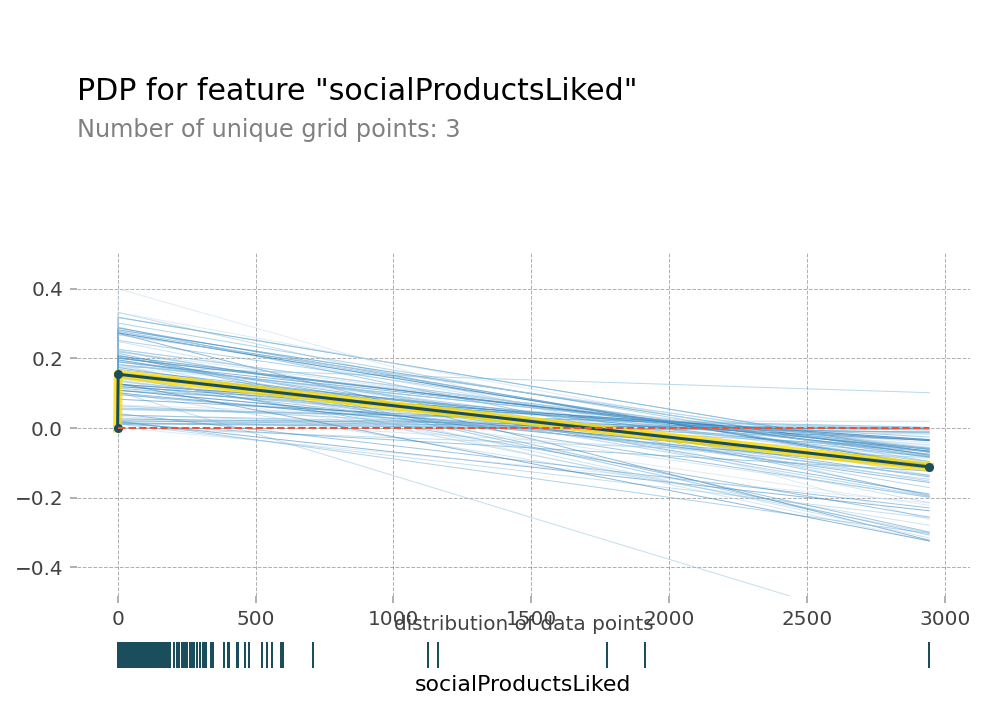

In [144]:


pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=100,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True, # 그래프 아래 분포도 함께 표시
    figsize=(8,6),
)

##### 🥕 <font color ='Orange'> **PDP interact_(socialNbFollowers-daysSinceLogin)** </font>

In [111]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

(<Figure size 1152x864 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7f83c850>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7f5709d0>})

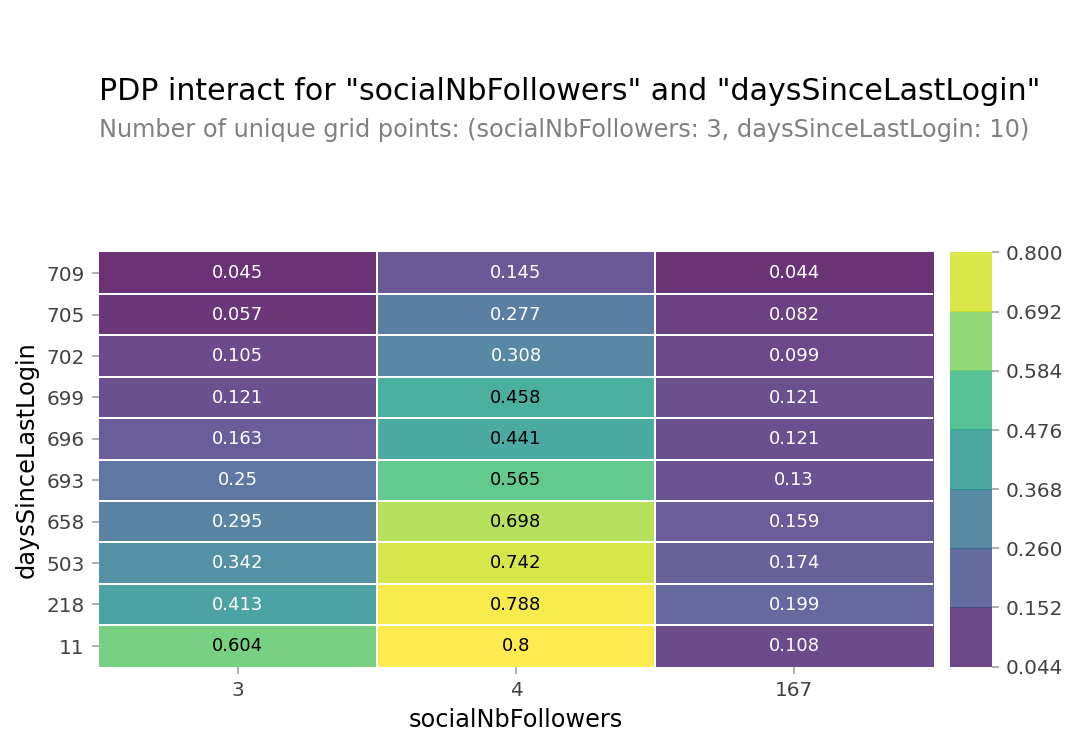

In [121]:
target_features = ["socialNbFollowers", "daysSinceLastLogin"]

interaction = pdp_interact(
    model=pipe,
    dataset=X_val,
    model_features=X_val.columns,
    features=target_features,
)

# pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)
pdp_interact_plot(interaction, plot_type="grid",figsize=(8,6), feature_names=target_features)


##### 🥕 <font color ='Orange'> **PDP interact_(socialNbFollowers-productsWished)** </font>

(<Figure size 1152x864 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7e6d3b10>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7e68c3d0>})

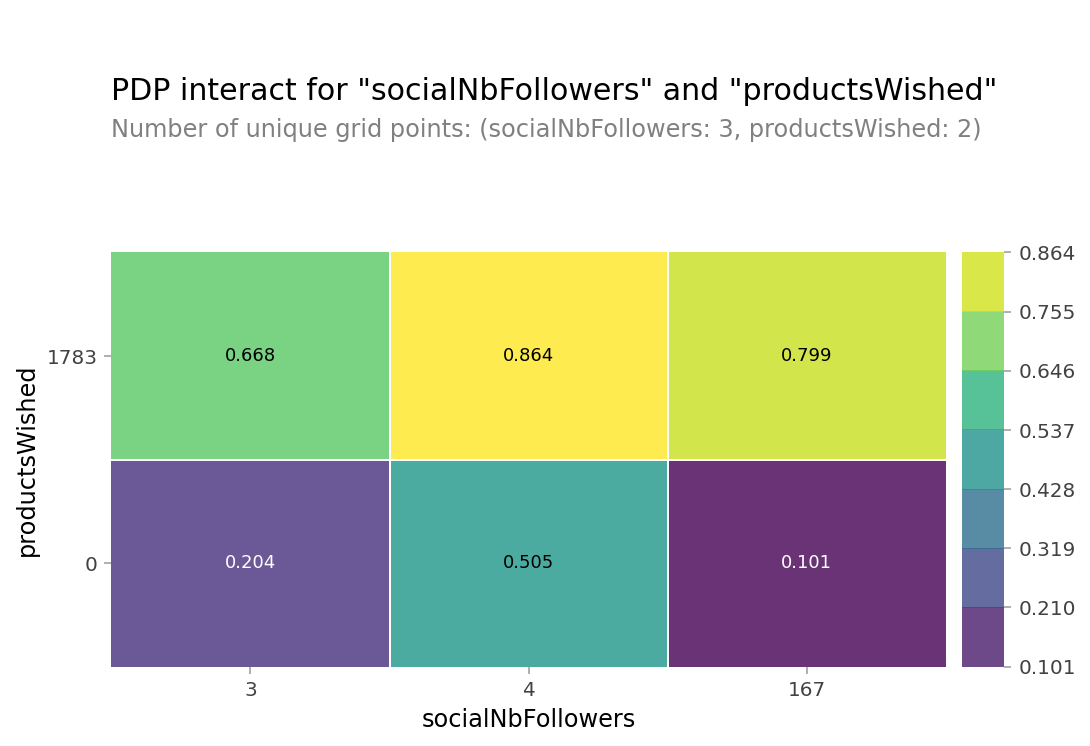

In [130]:
target_features = ["socialNbFollowers","productsWished"]

interaction = pdp_interact(
    model=pipe,
    dataset=X_val,
    model_features=X_val.columns,
    features=target_features,
)

# pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)
pdp_interact_plot(interaction, plot_type="grid",figsize=(8,6), feature_names=target_features)


##### 🥕 <font color ='Orange'> **PDP interact_(socialNbFollowers-socialProductsLiked)** </font>

(<Figure size 1152x864 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7e5b40d0>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7e531450>})

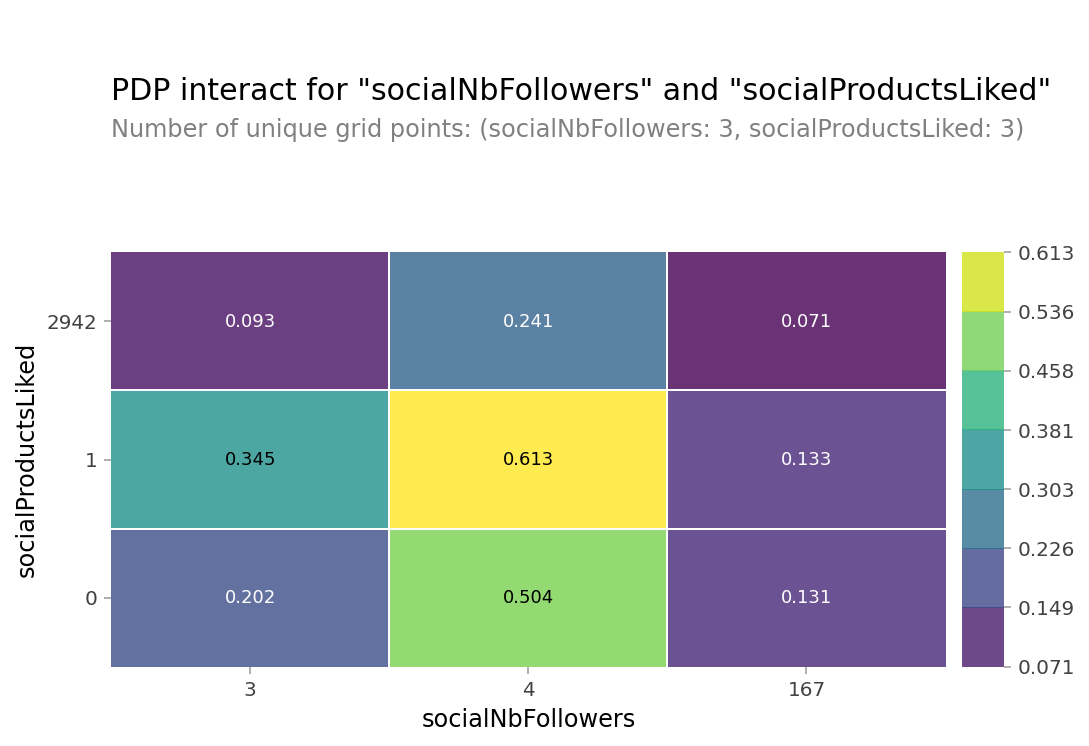

In [131]:
target_features = ["socialNbFollowers","socialProductsLiked"]

interaction = pdp_interact(
    model=pipe,
    dataset=X_val,
    model_features=X_val.columns,
    features=target_features,
)

# pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)
pdp_interact_plot(interaction, plot_type="grid",figsize=(8,6), feature_names=target_features)


##### 🥕 <font color ='Orange'> **PDP interact_(daysSinceLastLogin-productsWished)** </font>

(<Figure size 1152x864 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7e5cb650>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7e32c9d0>})

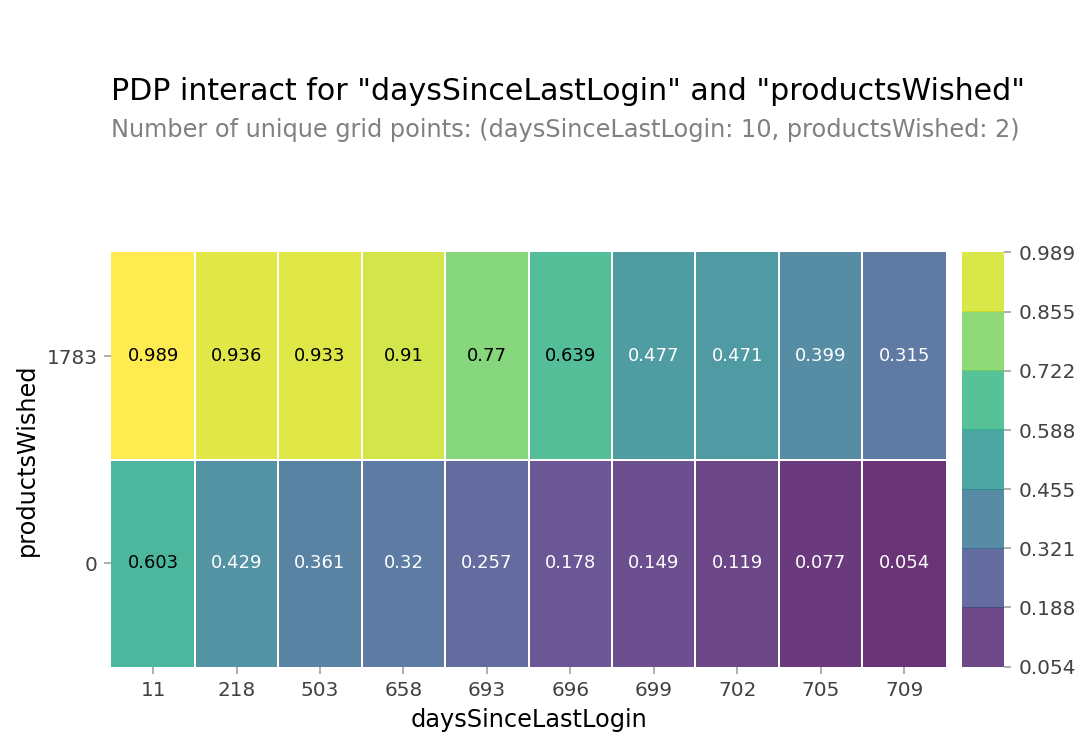

In [133]:
target_features = ["daysSinceLastLogin","productsWished"]

interaction = pdp_interact(
    model=pipe,
    dataset=X_val,
    model_features=X_val.columns,
    features=target_features,
)

# pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)
pdp_interact_plot(interaction, plot_type="grid",figsize=(8,6), feature_names=target_features)


##### 🥕 <font color ='Orange'> **PDP interact_(daysSinceLastLogin-socialProductsLiked)** </font>

(<Figure size 1152x864 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7e49a990>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7e301b90>})

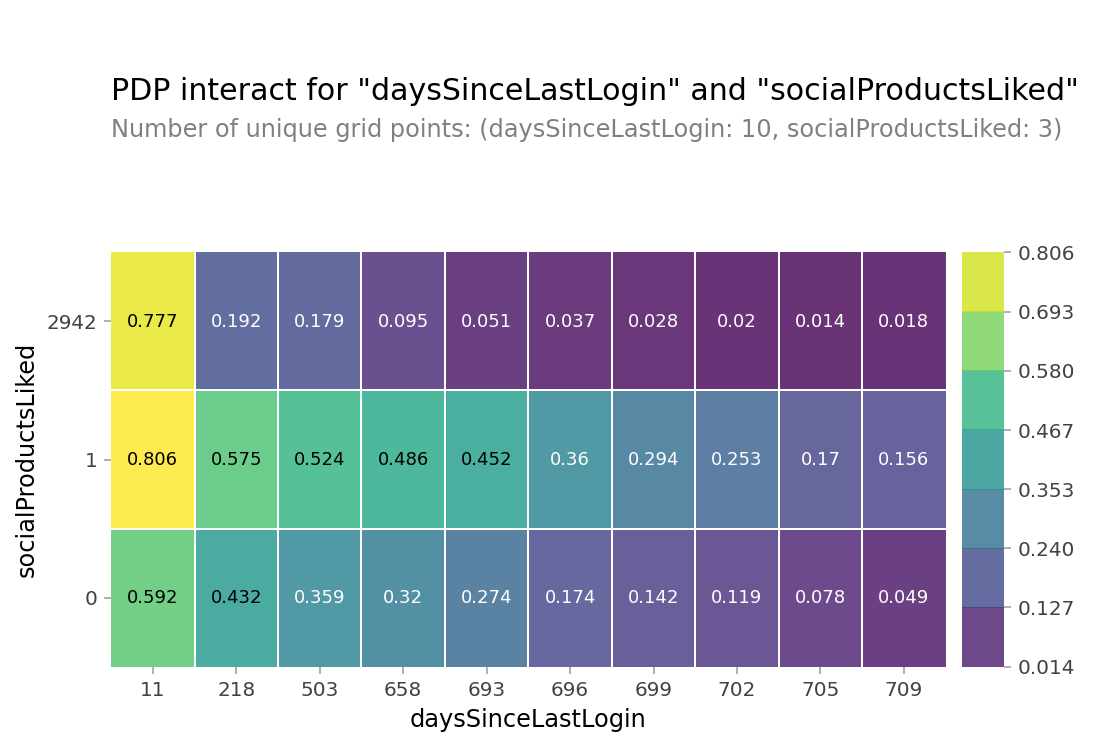

In [134]:
target_features = ["daysSinceLastLogin","socialProductsLiked"]

interaction = pdp_interact(
    model=pipe,
    dataset=X_val,
    model_features=X_val.columns,
    features=target_features,
)

# pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)
pdp_interact_plot(interaction, plot_type="grid",figsize=(8,6), feature_names=target_features)


##### 🥕 <font color ='Orange'> **PDP interact_(productsWished-socialProductsLiked)** </font>

(<Figure size 1152x864 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7eebea50>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee7e2ee310>})

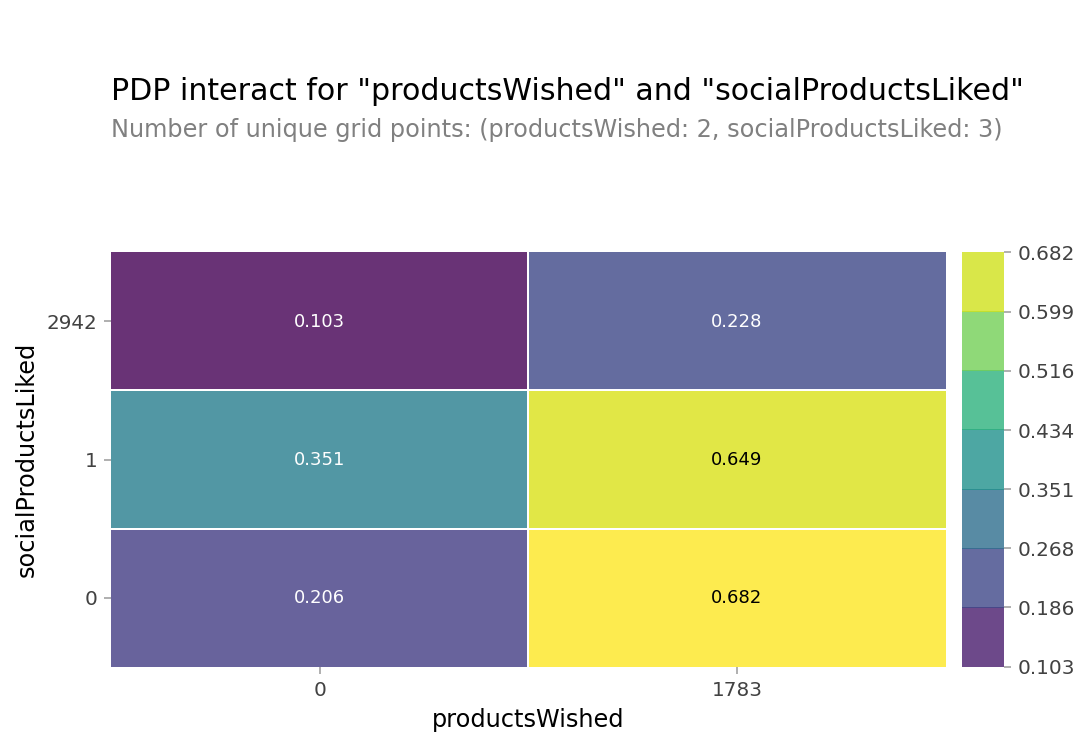

In [135]:
target_features = ["productsWished","socialProductsLiked"]

interaction = pdp_interact(
    model=pipe,
    dataset=X_val,
    model_features=X_val.columns,
    features=target_features,
)

# pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)
pdp_interact_plot(interaction, plot_type="grid",figsize=(8,6), feature_names=target_features)


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# df_B.query('(socialNbFollowers >3) &(Buy ==1)').sort_values(by='socialNbFollowers', ascending=False).sample(10)
df_B.query('(socialNbFollowers >3)').sort_values(by='socialNbFollowers', ascending=False).sample(10)

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,civilityGenderId,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,Buy
13037,fr,4,9,0,0,0,0.0,0,2,False,False,True,695,2856,0
13471,en,4,8,68,0,0,0.0,7,2,False,False,True,14,2855,0
11403,en,4,8,0,0,0,0.0,0,2,False,False,True,618,2857,0
12300,de,4,8,0,0,0,0.0,0,2,False,False,True,696,2857,0
1525,en,5,8,15,0,1,0.0,18,2,False,False,True,606,3196,1
11148,en,4,8,0,0,0,0.0,0,2,False,False,True,696,2857,0
2297,en,13,8,0,0,0,0.0,0,1,False,False,True,23,2859,0
10470,en,4,8,0,0,0,0.0,0,2,False,False,True,696,2857,0
5980,es,5,8,0,0,0,0.0,0,2,False,False,True,559,2852,0
11756,es,4,9,0,0,0,0.0,0,2,True,False,False,608,2857,0


## 🧪 Random Forest (recall = 0.3)

In [53]:
# Train, Valuation, Test split

from sklearn.model_selection import train_test_split

target = 'Buy'

train, test = train_test_split(df_B, test_size=0.2, stratify=df_B[target])
train, val = train_test_split(train, test_size=0.2, stratify=train[target])


# Target, Features split

y_train = train[target]
X_train = train.drop(columns = target)
y_val = val[target]
X_val = val.drop(columns = target)
y_test = test[target]
X_test = test.drop(columns = target)

# X_train, y_train = train.drop(columns=target), train[target]
# X_val, y_val = val.drop(columns=target), val[target]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(63304, 14) (63304,) (15826, 14) (15826,) (19783, 14) (19783,)


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

pipe_rf = make_pipeline(
    OrdinalEncoder(),
    # SimpleImputer(),
    RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1),
)

pipe_rf.fit(X_train, y_train)
print("훈련 정확도: ", pipe_rf.score(X_train, y_train))
print("검증 정확도: ", pipe_rf.score(X_val, y_val))

훈련 정확도:  0.9949766207506635
검증 정확도:  0.9523568810817642


In [55]:
# out-of-bag sample을 이용하여 oob_score를 구할 수 있습니다.
pipe_rf.named_steps["randomforestclassifier"].oob_score_

0.9484550739289777

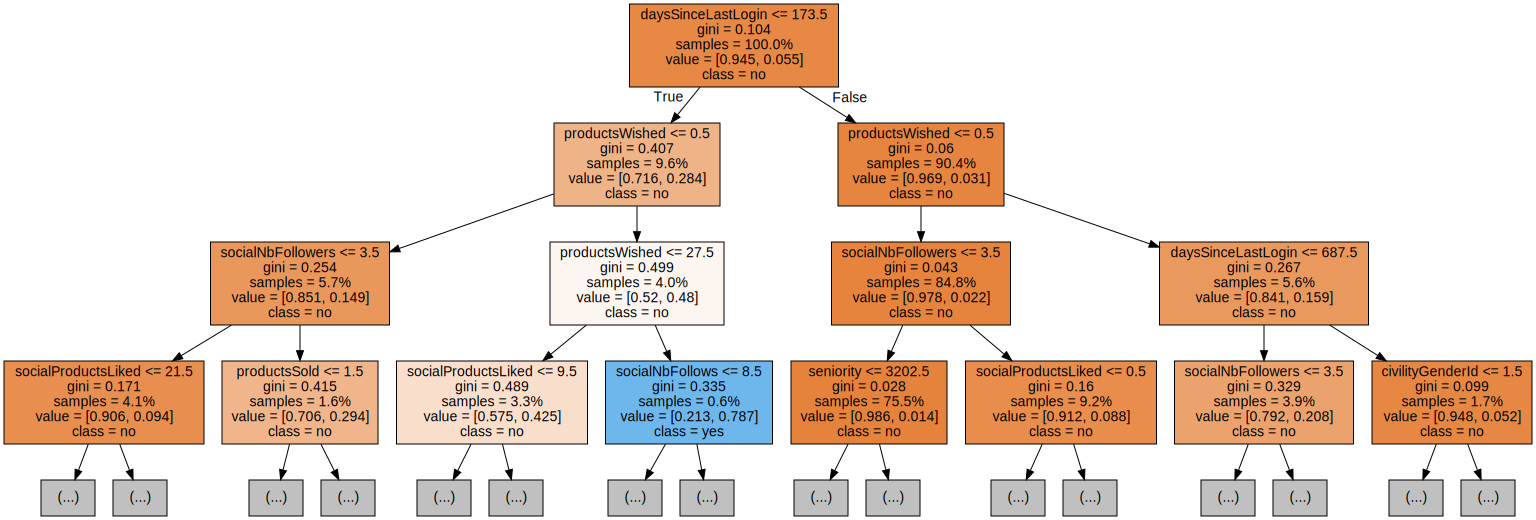

In [63]:
import graphviz
from sklearn.tree import export_graphviz

# graphviz 설치방법: conda install -c conda-forge python-graphviz

# named_steps 속성을 사용해서 파이프라인의 각 스텝에 접근이 가능합니다.
# named_steps 은 유사 딕셔너리 객체(dictionary-like object)로 파이프라인 내 과정에 접근 가능하도록 합니다.
model_dt = pipe_rf.named_steps['randomforestclassifier']
enc = pipe_rf.named_steps['ordinalencoder']
encoded_columns = enc.transform(X_val).columns

# RandomForestClassifier는 ensemble tree 모델이기 때문에 여러 트리 중의 1개를 골라서 출력하면 됩니다.
# estimator = model_dt.estimators_[15]
estimator = model_dt.estimators_[29]


dot_data = export_graphviz(estimator
                          , max_depth=3
                          , feature_names=encoded_columns
                          , class_names=['no', 'yes']
                          , filled=True
                          , proportion=True)


display(graphviz.Source(dot_data))


In [ ]:
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, accuracy_score

print('support 는 True data에서의 count를 내 놓음\n')
print(classification_report(y_val, y_val_pred))

# accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# print(f'accuracy of logistic regression is {accuracy.round(2)}')
print(f'precision of logistic regression is {precision.round(2)}')
print(f'recall of logistic regression is {recall.round(2)}')
print(f'f1 of logistic regression is {f1.round(2)}')

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     14959
           1       0.64      0.30      0.41       867

    accuracy                           0.95     15826
   macro avg       0.80      0.65      0.69     15826
weighted avg       0.94      0.95      0.94     15826



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


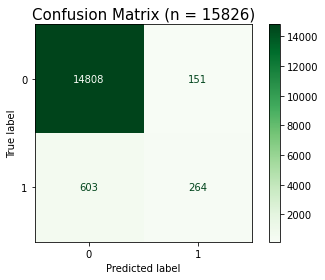

AUC: 0.8581377718859846


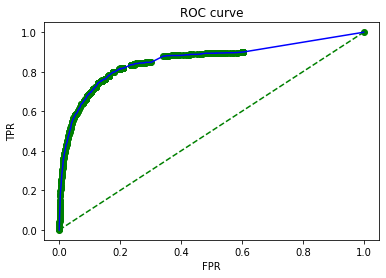

In [65]:
print(classification_report(y_val, pipe_rf.predict(X_val)))

plot_confusion_matrix(pipe_rf, X_val, y_val, cmap=plt.cm.Greens)
plt.title(f"Confusion Matrix (n = {len(y_val)})", fontsize=15)
plt.show()


y_pred_proba = pipe_rf.predict_proba(X_val)[:, 1]   # predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1 사이의 값으로 돌려준다. 
print("AUC:", roc_auc_score(y_val, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_val, [0] * len(y_val))
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="green")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()